<a href="https://colab.research.google.com/github/arthursaka/datasets/blob/main/C%C3%B3pia_de_%5BHarve%5D_FDS_MODELO_PROJETO_FINAL_ARTIGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Artigo de conclusão da Formação em Cientista de Dados**

NOME DO ALUNO - Arthur Sakamoto




TURMA - T06



# **Resumo**



Em poucas linhas explique o projeto, como motivação e processo para o mesmo.


# **Objetivo**

Explique o objetivo do projeto, o que pretende atingir.


# **Execução do projeto**










Forneça detalhes das etapas e ferramentas para o projeto. Quais bases de dados foram usadas? Quais dados elas continham? Qual foram os critérios de seleção do Modelo, se houver um modelo. 


In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/arthursaka/datasets/main/divorce.csv.csv', delimiter=';')
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1


In [ ]:
X =  df.drop(["Class"],axis = 1) 
y = df["Class"] 

In [ ]:
# Importação de uma ferramenta que divide os conjuntos (Treino e Teste)
from sklearn.model_selection import train_test_split

# Vamos utilizar 70% dos nossos dados para treinar o modelo e 20% para testar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Importando o pacote com o modelo 
from sklearn.tree import DecisionTreeClassifier

# Definindo o modelo escolhido
modelo = DecisionTreeClassifier(max_depth=100)

In [ ]:
modelo.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
import pandas as pd

print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Previsto'], margins=True))

Previsto   0   1  All
Real                 
0         13   1   14
1          1  19   20
All       14  20   34


In [ ]:
# Outra forma de exibir as medidas de desempenho de classificação
from sklearn.metrics import classification_report

class_names = ['Classe 0', 'Classe 1']

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    Classe 0       0.93      0.93      0.93        14
    Classe 1       0.95      0.95      0.95        20

    accuracy                           0.94        34
   macro avg       0.94      0.94      0.94        34
weighted avg       0.94      0.94      0.94        34



In [ ]:
print(modelo.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.94256757 0.         0.         0.         0.         0.
 0.         0.02832284 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.02910959 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


In [ ]:
modelo.score(X_train,y_train)

1.0

In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

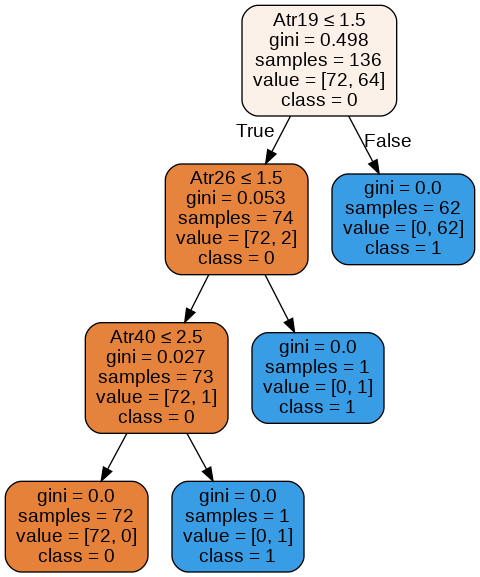

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(modelo, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = df.columns[0:54],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('divorce.png')
Image(graph.create_png())


* Random Forest

In [ ]:
# Função para criação de dados sintéricos 
from sklearn.datasets import make_classification
# Criação do conjunto sintético
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# Resumo dos dados
print(X.shape, y.shape)

(1000, 20) (1000,)


In [ ]:
X

array([[ -8.52381793,   5.24451077, -12.14967704, ...,   1.05057966,
          0.6975331 ,   0.26076035],
       [ -0.05916285,  -3.54893654,   0.28450157, ...,   2.25695685,
          1.22878976,  -2.35705572],
       [  1.43722964,  -2.7930806 ,   3.06777424, ...,   7.17348666,
          2.7348798 ,  -5.86519533],
       ...,
       [  3.16342902,  -9.33711497,   9.98425127, ...,  -2.10531942,
         -0.81155073,  -1.87188942],
       [ -9.02657972,   2.59981304,  -4.6665526 , ...,  -1.4839017 ,
         -1.30836833,   0.22976655],
       [ -2.91686079,   2.27957528,  -1.00615184, ...,  -0.67922735,
         -2.84990903,  -2.06836683]])

In [ ]:
y

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,

In [ ]:
# Importação de uma ferramenta que divide os conjuntos (Treino e Teste)
from sklearn.model_selection import train_test_split

# Vamos utilizar 80% dos nossos dados para treinar o modelo e 20% para testar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Importando o pacote com o modelo 
from sklearn.ensemble import RandomForestClassifier

# Definindo o modelo escolhido
modelo = RandomForestClassifier(n_estimators=10)

In [ ]:
modelo.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
import pandas as pd

print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Previsto'], margins=True))

Previsto    0   1  All
Real                  
0         105   9  114
1          18  68   86
All       123  77  200


In [ ]:
# Outra forma de exibir as medidas de desempenho de classificação
from sklearn.metrics import classification_report

class_names = ['Classe 1', 'Classe 2']

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    Classe 1       0.85      0.92      0.89       114
    Classe 2       0.88      0.79      0.83        86

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



In [ ]:
modelo.score(X_train,y_train)

0.995

In [ ]:
import pandas as pd

importancia_caract = pd.Series(modelo.feature_importances_,index=range(0,20)).sort_values(ascending=False)
importancia_caract

5     0.162757
10    0.136651
6     0.067400
8     0.065679
19    0.053788
4     0.050561
18    0.046381
7     0.044209
0     0.043751
9     0.041426
16    0.039446
11    0.038190
1     0.032784
12    0.030740
17    0.028965
2     0.026548
14    0.026161
13    0.023227
3     0.021250
15    0.020085
dtype: float64

# **Conclusões**



Com os dados obtidos quais conclusões foram encontradas e quais passos podem ser necessários para um futuro desenvolvimento do projeto


# **Referências e Notebooks**

Informe os links de notebooks, blogs e livros que foram utilizados. Exemplos abaixo.


Notebook do Projeto, disponível em: www.site.com.br


Notebook do Projeto, disponível em: www.site.com.br


Livro Data Science do Zero, Editora Novatec.
